# Data Science Final Project: Part 1 Analysis

This is a preliminary analysis of the rental data to predict rents for test 2 data. It is expected further work in Part 2 will result in improved estimations. This analysis and the outcomes will form the basis of Part 2.  
This file has been broken up into 3 parts: 


1.   Data Exploration [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=K-ZZpcoaiGY6]
2.   Data Preprocessing [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=HgGR6M-aojEZ]
3.   Data Modelling [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=aPjrrxHJot6h]
4.  Summary of Results and Further Work [https://colab.research.google.com/drive/1ui-CU-qfreGNuP69NaVPlmFKIiNBFxuL#scrollTo=9IVaqCL3pKBX]





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

In [2]:
train_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_train.csv', index_col=0)
test_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test1.csv', index_col=0)
submit1_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test2.csv', index_col=0)
submit2_df = pd.read_csv('https://grantmlong.com/data/SE_rents2018_test3.csv', index_col=0)

## Data Exploration

This section we look at the data and determine the features for our model. We build our training data




In [3]:
train_df.sample(5).transpose()

rental_id,7321711,7234495,7174345,7250641,7364116
addr_unit,#1B,#2,#D3,#3F,#1B
building_id,198016,48442,1297417,383323,331207
bedrooms,1,3,1,4,2
bathrooms,1,1,1,4,1
size_sqft,520,1005,715,1200,700
created_at,2018-06-30 09:31:53,2018-06-04 10:33:52,2018-05-14 11:44:58,2018-06-07 16:58:02,2018-07-13 14:26:13
addr_street,411 20 STREET,633 2 AVENUE,25-34 CRESCENT STREET,186 SCHOLES STREET,221 ST JAMES PLACE
addr_city,Brooklyn,New York,Astoria,Brooklyn,Brooklyn
addr_zip,11215,10016,11102,11206,11238
addr_lat,40.6586,40.7453,40.7724,40.7087,40.683


In [4]:
train_df.shape

(12000, 38)

In [5]:
test_df.shape

(2000, 38)

In [6]:
submit1_df.shape

(2000, 38)

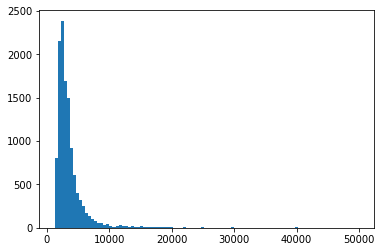

In [8]:
_ = plt.hist(train_df['rent'], bins=100)

In [ ]:
train_df['rent'].describe()

In [ ]:
train_df['rent'].isna().sum()

In [ ]:
print(list(train_df))

In [ ]:
train_df.describe()

In [9]:
train_df.corr()

,building_id,bedrooms,bathrooms,size_sqft,addr_zip,addr_lat,addr_lon,bin,bbl,floor_count,...,has_washer_dryer,has_garage,has_roofdeck,has_concierge,has_pool,has_garden,has_childrens_playroom,rent,no_fee,floornumber
building_id,1.000000,-0.001813,-0.016501,-0.006433,0.064199,-0.008653,0.105315,0.117460,0.090194,-0.116488,...,-0.030651,0.099141,-0.012773,-0.060398,0.038340,0.064100,0.011357,-0.035145,0.052429,-0.003418
bedrooms,-0.001813,1.000000,0.464287,0.525537,0.187639,-0.114986,0.093089,0.142331,0.151078,-0.228858,...,0.117120,-0.116837,-0.085111,-0.202524,-0.091116,0.048234,-0.083456,0.353337,-0.004335,-0.158895
bathrooms,-0.016501,0.464287,1.000000,0.565788,-0.088524,0.028441,-0.062992,-0.100642,-0.106358,0.091489,...,0.298722,0.051650,0.102592,0.105276,0.089527,0.104741,0.111949,0.611987,-0.003053,0.116938
size_sqft,-0.006433,0.525537,0.565788,1.000000,0.000576,-0.037717,-0.035054,-0.013148,-0.011608,0.020547,...,0.263907,0.005959,0.026781,0.040962,0.051020,0.137652,0.068867,0.649984,-0.074162,0.054328
addr_zip,0.064199,0.187639,-0.088524,0.000576,1.000000,-0.577385,0.462277,0.950995,0.952018,-0.447352,...,-0.113234,-0.116047,-0.107670,-0.354300,-0.193333,-0.006699,-0.162588,-0.325241,-0.066025,-0.376063
addr_lat,-0.008653,-0.114986,0.028441,-0.037717,-0.577385,1.000000,0.219029,-0.429858,-0.424711,0.195647,...,0.013967,0.057687,-0.000782,0.146865,0.104243,0.000178,0.066387,0.109536,0.002401,0.170598
addr_lon,0.105315,0.093089,-0.062992,-0.035054,0.462277,0.219029,1.000000,0.554511,0.563806,-0.281790,...,-0.165555,-0.055615,-0.168426,-0.270704,-0.100606,-0.038981,-0.140828,-0.262711,-0.041091,-0.239193
bin,0.117460,0.142331,-0.100642,-0.013148,0.950995,-0.429858,0.554511,1.000000,0.994155,-0.426813,...,-0.119801,-0.089042,-0.112548,-0.323696,-0.182156,-0.007928,-0.144938,-0.332165,-0.111486,-0.350957
bbl,0.090194,0.151078,-0.106358,-0.011608,0.952018,-0.424711,0.563806,0.994155,1.000000,-0.442496,...,-0.137143,-0.109457,-0.135245,-0.346828,-0.193851,-0.021434,-0.169315,-0.339157,-0.126716,-0.367065
floor_count,-0.116488,-0.228858,0.091489,0.020547,-0.447352,0.195647,-0.281790,-0.426813,-0.442496,1.000000,...,0.177199,0.380581,0.361168,0.655252,0.498138,0.084536,0.395460,0.253517,0.185316,0.769707


In [10]:
# calculate correlation matrix
corr = train_df[["bedrooms", "bathrooms", "min_to_subway", "size_sqft", "floornumber", "year_built","has_doorman", "rent"]].corr()
corr

,bedrooms,bathrooms,min_to_subway,size_sqft,floornumber,year_built,has_doorman,rent
bedrooms,1.000000,0.464287,0.014171,0.525537,-0.158895,-0.056614,-0.233059,0.353337
bathrooms,0.464287,1.000000,0.017966,0.565788,0.116938,-0.004480,0.108987,0.611987
min_to_subway,0.014171,0.017966,1.000000,0.007718,-0.012333,-0.031395,-0.016984,0.000010
size_sqft,0.525537,0.565788,0.007718,1.000000,0.054328,-0.021524,0.047766,0.649984
floornumber,-0.158895,0.116938,-0.012333,0.054328,1.000000,0.095295,0.523314,0.267151
year_built,-0.056614,-0.004480,-0.031395,-0.021524,0.095295,1.000000,0.094629,-0.001037
has_doorman,-0.233059,0.108987,-0.016984,0.047766,0.523314,0.094629,1.000000,0.273486
rent,0.353337,0.611987,0.000010,0.649984,0.267151,-0.001037,0.273486,1.000000


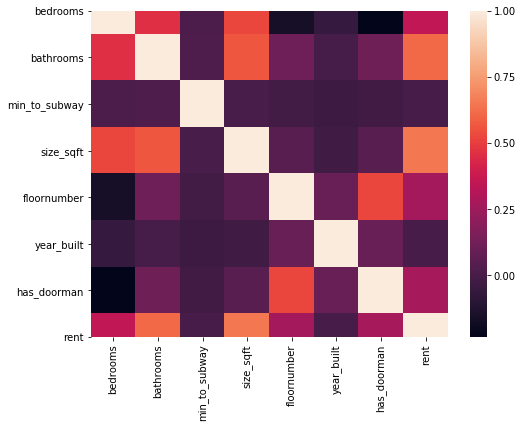

In [11]:
# visualize correlation matrix
plt.subplots(figsize=(8,6))

fig = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)



Note: Bedrooms has the highest correlation (positive) with rent

In [ ]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    

columns = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman', 'rent', 'has_washer_dryer', 'has_concierge', 'floornumber'
]
corr = train_df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

In [ ]:
_ = plt.plot(train_df['rent'], train_df['size_sqft'], marker='.', linestyle='none')

In [ ]:
_ = plt.plot(train_df['rent'], train_df['bathrooms'], marker='.', linestyle='none')

In [ ]:
_ = plt.plot(train_df['rent'], train_df['bedrooms'], marker='.', linestyle='none')

In [12]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber'
]
train_features = train_df[feature_cols] 

In [13]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber'
]
test_features = test_df[feature_cols] 

In [14]:
# extract usable features
feature_cols = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber'
]
test_features = test_df[feature_cols] 

c:\users\taimoor\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

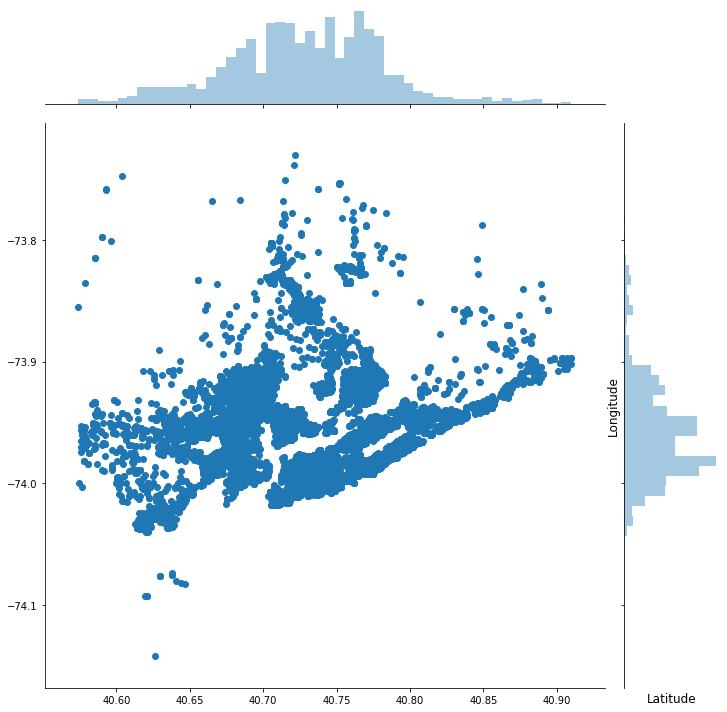

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [42]:
plt.figure(figsize=(10,10))
sns.jointplot(x=train_df.addr_lat.values, y = train_df.addr_lon.values, size = 10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Adding a new feature using existing data: Distance to Central Park. Idea: the closer to central park the more the rent. 

In [15]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm(lat1,lon1,lat2=40.78,lon2=-73.965):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [16]:
train_df2 = train_df
test_df2 = test_df

In [17]:
train_df2['dist_centralPark'] = getDistanceFromLatLonInKm(train_df['addr_lat'], train_df['addr_lon'])
test_df2['dist_centralPark'] = getDistanceFromLatLonInKm(test_df['addr_lat'], test_df['addr_lon'])

In [18]:
submit1_df['dist_centralPark'] = getDistanceFromLatLonInKm(submit1_df['addr_lat'], submit1_df['addr_lon'])

In [19]:
train_df2['dist_centralPark'].head(20)

rental_id
7236931    14.796742
7331920     7.806511
7139224     2.743952
7364827     3.660724
7242151    11.126183
7171210     2.331770
7286986     7.900183
7418503     2.803593
7304773     3.370226
7180240     2.530775
7199509     6.520788
7374106     7.727537
7211146     5.455471
7205032     9.249498
7303381     6.165054
7257553    10.045174
7371094     9.455008
7386616    19.309963
7161667     1.416285
7256881     1.781116
Name: dist_centralPark, dtype: float64

In [ ]:
_ = plt.plot(train_df['rent'], train_df2['dist_centralPark'], marker='.', linestyle='none')
plt.xlim(0, 10000)
# not really a correlation

In [20]:
# extract usable features
feature_cols2 = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber', 'dist_centralPark'
]
train_features2 = train_df2[feature_cols2] 

In [21]:
# extract usable features
feature_cols2 = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber', 'dist_centralPark'
]
test_features2 = test_df2[feature_cols2] 

In [22]:
def deg2rad(deg):
  return deg * (np.pi/180)

def getDistanceFromLatLonInKm2(lat1,lon1,lat2=40.758,lon2=-73.9855):
  R = 6371  # Radius of the earth in km
  dLat = deg2rad(lat2-lat1) 
  dLon = deg2rad(lon2-lon1) 
  a = np.sin(dLat/2) * np.sin(dLat/2) + np.cos(deg2rad(lat1)) * np.cos(deg2rad(lat2)) * np.sin(dLon/2) * np.sin(dLon/2)
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a)) 
  d = R * c  # Distance in km
  return d

In [23]:
train_df3 = train_df
test_df3 = test_df

In [24]:
train_df3['dist_timeSquare'] = getDistanceFromLatLonInKm2(train_df['addr_lat'], train_df['addr_lon'])
test_df3['dist_timeSquare'] = getDistanceFromLatLonInKm2(test_df['addr_lat'], test_df['addr_lon'])

In [25]:
submit1_df['dist_timeSquare'] = getDistanceFromLatLonInKm2(submit1_df['addr_lat'], submit1_df['addr_lon'])

In [26]:
train_df3['dist_timeSquare'].head(20)

rental_id
7236931    12.529424
7331920     4.882349
7139224     1.535301
7364827     0.747939
7242151     9.213716
7171210     5.180434
7286986     8.966177
7418503     4.594814
7304773     1.008166
7180240     1.543220
7199509     7.190453
7374106     5.890000
7211146     8.381801
7205032     8.244336
7303381     9.016044
7257553     8.325541
7371094     7.129432
7386616    16.851094
7161667     2.554158
7256881     4.394017
Name: dist_timeSquare, dtype: float64

In [ ]:
_ = plt.plot(train_df['rent'], train_df3['dist_timeSquare'], marker='.', linestyle='none')
plt.xlim(0, 10000)
# not really a correlation

Text(0.5, 1.0, 'Rent Vs Dist to Time Square')

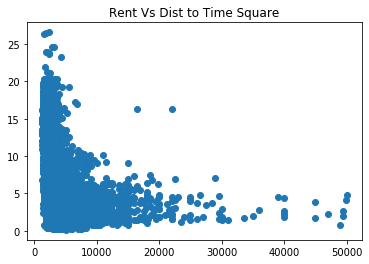

In [44]:
plt.scatter(train_df.rent, train_df.dist_timeSquare)
plt.title("Rent Vs Dist to Time Square")

In [27]:
# extract usable features
feature_cols3 = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber', 'dist_centralPark', 'dist_timeSquare'
]
train_features3 = train_df3[feature_cols3] 

In [28]:
# extract usable features
feature_cols3 = [
    'bedrooms', 'year_built', 'bathrooms', 'min_to_subway', 
    'size_sqft', 'no_fee', 'has_doorman',  'has_washer_dryer', 'floornumber', 'dist_centralPark', 'dist_timeSquare'
]
test_features3 = test_df3[feature_cols3] 

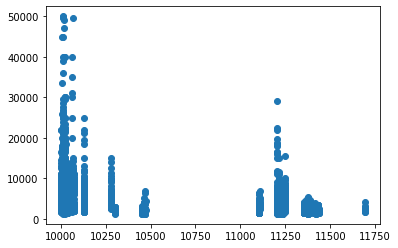

In [45]:
plt.scatter(train_df.addr_zip, train_df.rent)

## Data Preprocessing

This section we look at missing data and outliers and deal with these



#### 1. Missing Data
'min_to_subway', 'year_built' , 'floornumber' have NaNs. Solutions: drop or impute. This round we will impute as the feature 'floornumber' has 10% (1200) values missing and dropping this would reduce the data to only 10,000 points. 

In [ ]:
train_df['bedrooms'].isna().sum()


In [ ]:
train_df['year_built'].isna().sum()

In [ ]:
train_df['bathrooms'].isna().sum()

In [ ]:
train_df['min_to_subway'].isna().sum()

In [ ]:
train_df['size_sqft'].isna().sum()

In [ ]:
train_df['no_fee'].isna().sum()

In [ ]:
train_df['has_doorman'].isna().sum()

In [ ]:
train_df['has_washer_dryer'].isna().sum()

In [ ]:
test_df.isna().sum()

In [ ]:
train_df['floornumber'].isna().sum()

In [ ]:
train_df['floornumber'].describe()

In [ ]:
test_df['floornumber'].describe()

In [ ]:
train_df['min_to_subway'].describe()

In [ ]:
test_df['min_to_subway'].describe()

In [ ]:
train_df['year_built'].describe()

In [ ]:
test_df['year_built'].describe()

The features all have large outliers that result in a much higher mean than median so we will use median for the impute value for the missing values. 

In [29]:
# impute missing values with medians
train_features = train_features.fillna(train_features.median(), axis=0)

# construct target vector
train_target = train_df['rent']

In [30]:
# impute missing values with medians
train_features2 = train_features2.fillna(train_features2.median(), axis=0)

# construct target vector
train_target2 = train_df2['rent']

In [31]:
# impute missing values with medians
train_features3 = train_features3.fillna(train_features3.median(), axis=0)

# construct target vector
train_target3 = train_df3['rent']

#### 2. Outlier Data
From the above analysis it can be seen that the size_sqft and bathrooms have the value 0 for some data points. It is not possible for a rental space to have no size and it unusal for no bathroom in a rental. 

In [ ]:
(train_features['size_sqft']==0).sum()
## 841 values have outlier value of 0 for size_sqft

In [ ]:
(test_features['size_sqft']==0).sum()

In [ ]:
(submit1_df['size_sqft']==0).sum()

In [ ]:
(train_features['bathrooms']==0).sum()
## 4 values have outlier value of 0 for bathrooms...No bathrooms??

In [ ]:
(test_features['bathrooms']==0).sum()

In [ ]:
(train_features['bedrooms']==0).sum()
## 1556 values have outlier value of 0 for bedrooms...No bedrooms??Commercial rental?

In [ ]:
no_bedrooms = train_df[train_df['bedrooms']==0]

In [ ]:
no_bedrooms.head(10)

In [ ]:
(test_features['bedrooms']==0).sum()

In [ ]:
(submit1_df['bedrooms']==0).sum()

##### Large data points

In [ ]:
o_df = train_df.loc[train_df.size_sqft>=8000]

In [ ]:
o_df

In [ ]:
obd_df = train_df.loc[train_df.bedrooms> 6]
obd_df

In [ ]:
obath_df = train_df.loc[train_df.bathrooms>=8]
obath_df
## Clearly row 7160572 of 12 bathrooms is an error as the description says 2 bed 2 bath
## row 7236325 also seems an error as there are only 2 bedrooms, most likely it should be 2 bath

At this point we are going to just be mindful of the outliers. In Part 2 we may consider adjusting these but it will depend if they will have an impact upon the results. At the moment they are only a couple of points out of 12,000.

## Data Modelling 
This section we look at different models and model our training data

In [ ]:
# training a linear regression model
lreg = LinearRegression()
lreg.fit(train_features, train_target)

# training a random forest regression model
rf = RandomForestRegressor()
rf.fit(train_features, train_target)

#training a gradient boosting regressor
gbt = GradientBoostingRegressor( )
gbt.fit(train_features, train_target)

In [ ]:
test_features = test_df[feature_cols] 

# impute missing values with medians
test_features = test_features.fillna(train_features.median(), axis=0)

In [ ]:
# construct predictions for linear regression 
test_df['predicted'] = lreg.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

In [ ]:
pd.DataFrame(lreg.coef_, index=feature_cols,  columns = ['Est. Coefficient'])

In [ ]:
_ = plt.scatter(train_df['rent'], lreg.predict(train_features))
_ = plt.xlabel("Rents: $Y_i$")
_ = plt.ylabel("Predicted rents: $\hat{Y}_i$")
_ = plt.title("Rents vs Predicted Rents: $Y_i$ vs $\hat{Y}_i$")
_ = plt.plot([0, 20000], [0, 20000], linewidth=4, color='red')

In [ ]:
# construct predictions for random forest regression
test_df['predicted'] = rf.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

In [ ]:
# construct predictions for gradient boosting regression
test_df['predicted'] = gbt.predict(test_features)

mean_squared_error(test_df['rent'], test_df['predicted'])

### 2. Model 2: Adding an additional feature: Distance to Central Park

In [ ]:
# training and test model for train_df2
# training a linear regression model
lreg2 = LinearRegression()
lreg2.fit(train_features2, train_target2)

# training a random forest regression model
rf2 = RandomForestRegressor()
rf2.fit(train_features2, train_target2)

#training a gradient boosting regressor
gbt2 = GradientBoostingRegressor( )
gbt2.fit(train_features2, train_target2)


In [ ]:
test_features2 = test_df2[feature_cols2] 

# impute missing values with medians
test_features2 = test_features2.fillna(train_features2.median(), axis=0)

In [ ]:
# construct predictions for linear regression 
test_df2['predicted'] = lreg2.predict(test_features2)

mean_squared_error(test_df2['rent'], test_df2['predicted'])

In [ ]:
# construct predictions for random forest regression
test_df2['predicted'] = rf2.predict(test_features2)

mean_squared_error(test_df2['rent'], test_df2['predicted'])

In [ ]:
# training and test model for train_df2
# training a linear regression model
lreg3 = LinearRegression()
lreg3.fit(train_features3, train_target3)

# training a random forest regression model
rf3 = RandomForestRegressor()
rf3.fit(train_features3, train_target3)

knn = KNeighborsRegressor()
knn.fit(train_features3, train_target3)

#training a gradient boosting regressor
gbt3 = GradientBoostingRegressor( )
gbt3.fit(train_features3, train_target3)



In [35]:
test_features3 = test_df3[feature_cols3] 

# impute missing values with medians
test_features3 = test_features3.fillna(train_features3.median(), axis=0)

In [ ]:
# construct predictions for linear regression 
test_df3['predicted'] = lreg3.predict(test_features3)

mean_squared_error(test_df3['rent'], test_df3['predicted'])

In [ ]:
# construct predictions for random forest regression
test_df3['predicted'] = rf3.predict(test_features3)

mean_squared_error(test_df3['rent'], test_df3['predicted'])

In [ ]:
# construct predictions for random forest regression
test_df3['predicted'] = gbt3.predict(test_features3)

mean_squared_error(test_df3['rent'], test_df3['predicted'])

In [41]:
# construct predictions for random forest regression
test_df3['predicted'] = knn.predict(test_features3)
mean_squared_error(test_df3['rent'], test_df3['predicted'])

3352000.97816

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
# Number of trees used in the boosting process
n_estimators = [100, 500, 900, 1100, 1500]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ['auto', 'sqrt', 'log2', None]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'max_depth': max_depth,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features,
                       'bootstrap': bootstrap}

In [ ]:
# Create the model to use for hyperparameter tuning
model = RandomForestRegressor(random_state = 42)

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=25, 
                               scoring = 'neg_mean_squared_error',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True,
                               random_state=42)

In [ ]:
# Fit on the training data
random_cv.fit(train_features3, train_target3)

In [ ]:
# Get all of the cv results and sort by the test performance
random_results = pd.DataFrame(random_cv.cv_results_).sort_values('mean_test_score', ascending = False)

random_results.head(10)

In [ ]:
random_cv.best_estimator_

In [ ]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]}

model = RandomForestRegressor(max_depth = 15,
                                  min_samples_leaf = 2,
                                  min_samples_split = 10,
                                  max_features = 'sqrt',
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_squared_error', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [ ]:
# Fit the grid search
grid_search.fit(train_features3, train_target3)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline


# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

In [ ]:
# Get the results into a dataframe
results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
figsize(8, 8)
plt.style.use('fivethirtyeight')
plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
plt.xlabel('Number of Trees'); plt.ylabel('Mean Squared Error'); plt.legend();
plt.title('Performance vs Number of Trees');

In [ ]:
test_features3 = test_df3[feature_cols3] 

# impute missing values with medians
test_features3 = test_features3.fillna(train_features3.median(), axis=0)

In [ ]:
# construct predictions for linear regression 
test_df3['predicted'] = grid_search.predict(test_features3)

mean_squared_error(test_df3['rent'], test_df3['predicted'])

## Summary of Results and Further Work
This section we look at the results of the modelling. Compare the results of the different models and then make decisions about further work to try improve the accuracy of our model in predicting the rents.

|        Model       |                  Description              |         MSE       |
|:-------------------|:-----------------------------------------:|------------------:|
|  Linear Regression |         train_df: No additional data      | 3674316.2820333852|
|  Random Forrest    |            train_df: No additional        | 2284878.990318595 |
|  Gradient Boosting |            train_df: No additional        | 2367734.7918685228|
|  Linear Regression | train_df2: Central Park distance included | 3475046.5877851504|
|   Random Forrest   | train_df2: Central Park distance included | 2065466.2843227144|
|  Linear Regression | train_df3: Time Square distance included  | 3149962.9103451534|
|   Random Forrest   | train_df3: Time Square distance included  | 1714305.522788979 |

In [ ]:
# Get numerical feature importances
importances = list(rf2.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features2, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

In [ ]:
# Get numerical feature importances
importances = list(rf3.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features3, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

The results above show that for the Random Forrest Regressor the features with the most importance are size_sqft, number of bathrooms and distance to Time Square. The red flag is the number of bedrooms does not have a significant influence whereas we would expect it would. This could be the result of 10-13% of the data having recorded 0 number of bedrooms, where we would expect at least one and inspection of the data shows its not commerical but residential. 

## Modelling of Data for Submission

In [ ]:
master_df = train_df3.append(test_df3, sort=False)

master_features = master_df[feature_cols3].fillna(master_df[feature_cols3].median(), axis=0)
master_target = master_df['rent']

rf.fit(master_features, master_target)

In [ ]:
master_df = train_df3.append(test_df3 sort=False)
master_features = master_df[feature_col2]

In [ ]:
master_df['predicted'] = rf.predict(master_features)

mean_squared_error(master_df['rent'], master_df['predicted'])

### Create Submission

In [ ]:
submit1_features3 = submit1_df[feature_cols3].fillna(master_df[feature_cols3].median(), axis=0)
submit1_df['predictions'] = rf.predict(submit1_features3)
submit1_df['predictions'].to_csv('sample_submission1.csv', header=True)

submit1_df['fake_rent'] = np.ones(submit1_df['predictions'].shape) * master_target.median()
mean_squared_error(submit1_df['predictions'], submit1_df['fake_rent'])